In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap

seed = 12345

In [6]:
def plot_dataset(X, y, ax, axes=[-1, 1, -1, 1], marker='o', size=50, alpha=1.0, stepsize=0.5, grid=False, cmap=ListedColormap(['#FF0000', '#0000FF'])):
    """Simple routine to visualize a 2D dataset"""
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k', marker=marker, s=size, alpha=alpha)
    ax.axis(axes)
    ax.grid(grid, which='both')
    ax.set_xlabel(r"$x_1$", fontsize=24)
    ax.set_ylabel(r"$x_2$", fontsize=24, rotation=0)
    ax.xaxis.set_ticks(np.arange(axes[0], axes[1]+0.01, stepsize))
    ax.yaxis.set_ticks(np.arange(axes[2], axes[3]+0.01, stepsize))

def visualize_dataset():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    ax1.set_title("Total", fontsize=24)
    plot_dataset(X, y, ax1)
    ax1.grid()
    ax2.set_title("Train", fontsize=24)
    plot_dataset(X_train, y_train, ax2, marker='s', size=80)
    ax2.grid()
    ax3.set_title("Test", fontsize=22)
    plot_dataset(X_test, y_test, ax3, marker='^', size=100)
    ax3.grid()
    plt.rcParams['font.size'] = 15
    plt.tight_layout()
    plt.show()

# Iris dataset

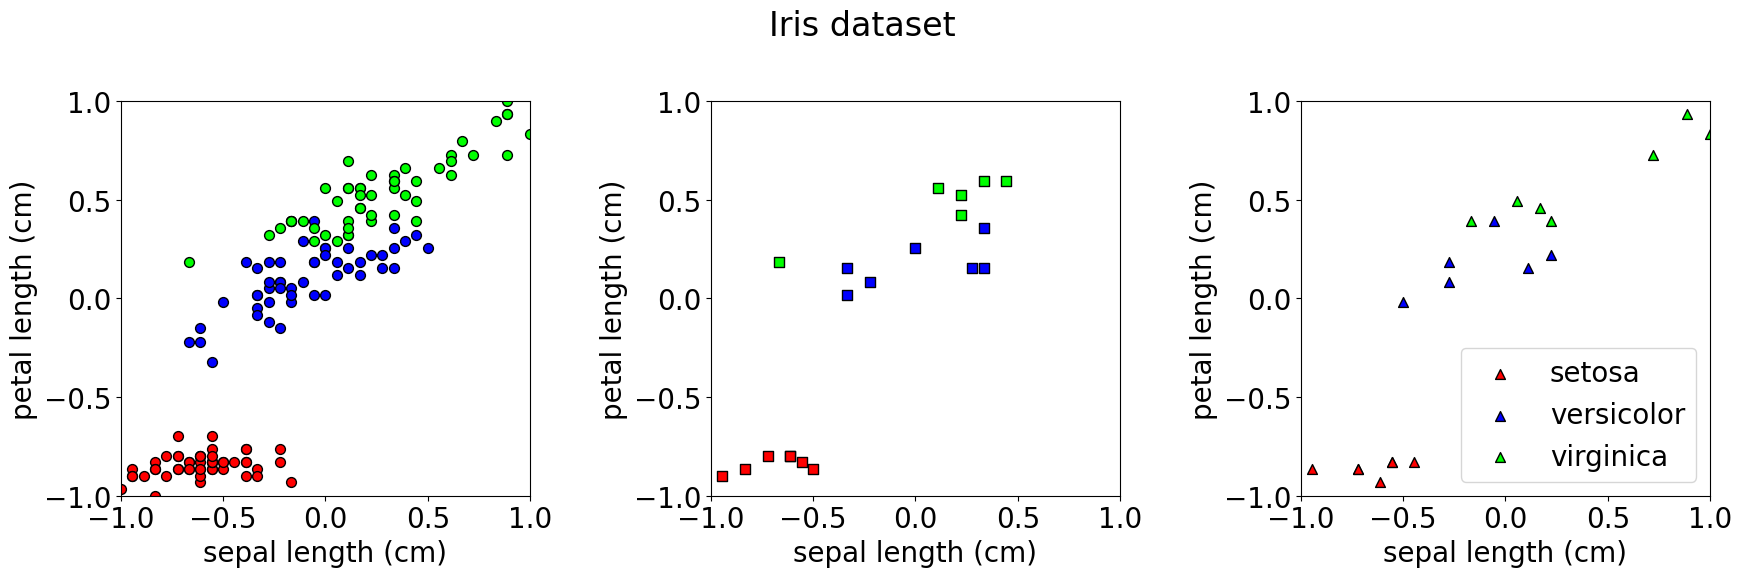

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

pair = [0, 2]
X = iris.data[:, pair]
y = iris.target

# Data rescaling
xmin = -1; xmax = 1
X = MinMaxScaler(feature_range=(xmin, xmax), copy=False).fit_transform(X)

# Train/Test subdivision
train_size = 20; test_size = 20 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=train_size, test_size=test_size, 
    stratify=y,
    random_state=seed
)

def iris_visualize_dataset(X, y, ax, marker='o'):
    n_classes = 3
    plot_colors = ['#FF0000', '#0000FF', '#00FF00']
    cmap = ListedColormap(plot_colors)
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=50,
            marker=marker
        )

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
iris_visualize_dataset(X, y, axs[0])
iris_visualize_dataset(X_train, y_train, axs[1], marker='s')
iris_visualize_dataset(X_test, y_test, axs[2], marker='^')
for ax in axs:
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    ax.set_xlabel(iris.feature_names[pair[0]])
    ax.set_ylabel(iris.feature_names[pair[1]])

plt.rcParams['font.size'] = 20
plt.suptitle("Iris dataset")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Blobs dataset

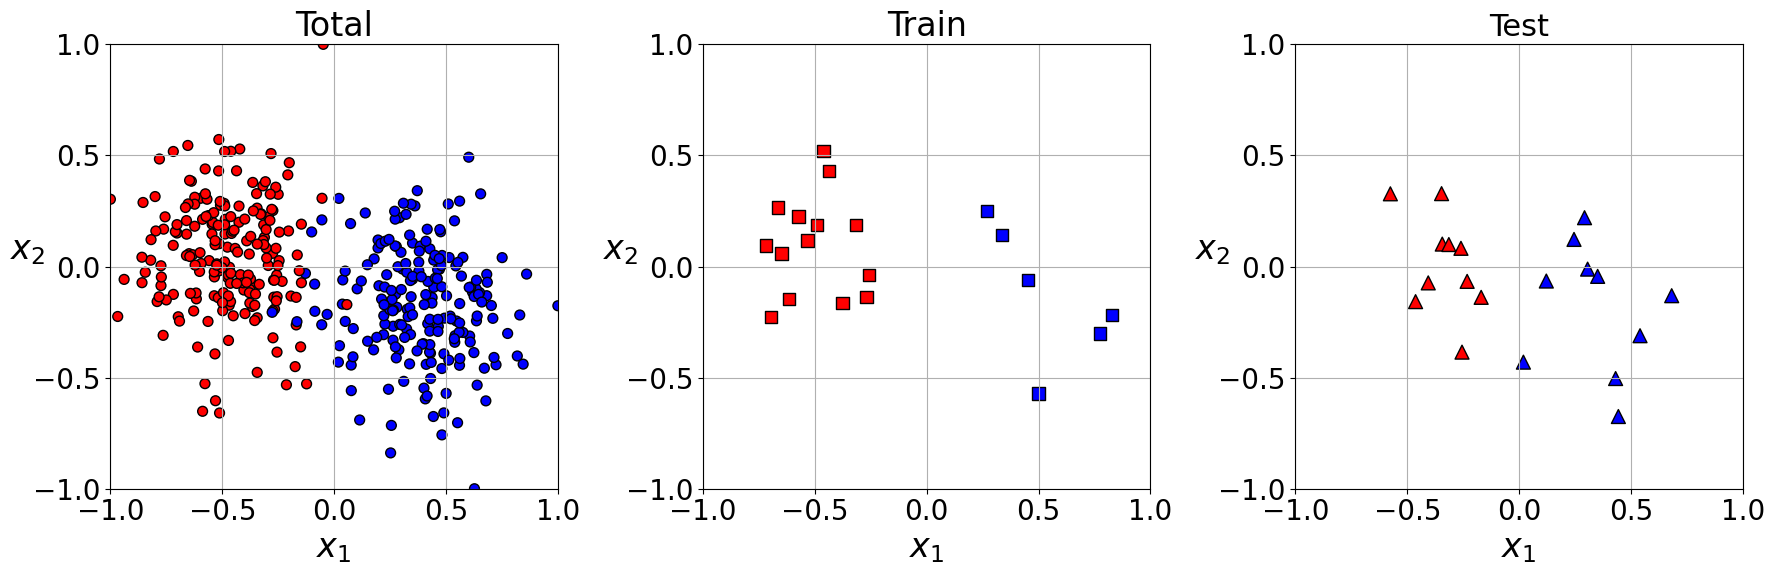

In [8]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

n_samples = 400
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=2, random_state=110, shuffle=True, cluster_std=1.2)
y[y%2 == 0] = -1
y[y > 0] = 1

xmin = -1; xmax = 1
X = MinMaxScaler(feature_range=(xmin, xmax)).fit_transform(X)

train_size = 20
test_size = 20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=train_size, test_size=test_size, 
    random_state=seed
)

visualize_dataset()

# Circles dataset

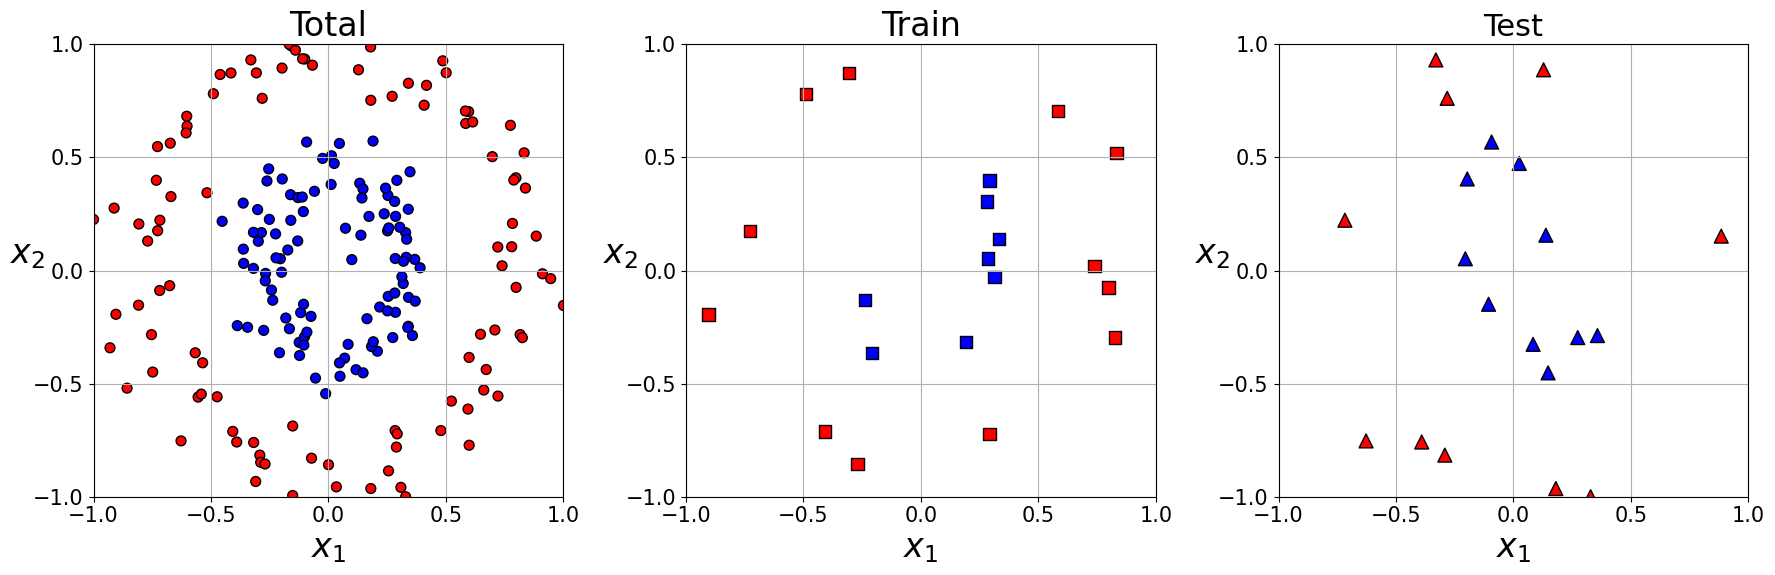

In [9]:
from sklearn.datasets import make_circles

n_samples = 200
X, y = make_circles(n_samples, noise=0.1, factor=0.4, random_state=0)

y[y%2 == 0] = -1
y[y > 0] = 1

xmin = -1; xmax = 1
X = MinMaxScaler(feature_range=(xmin, xmax)).fit_transform(X)

train_size = 20
test_size = 20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=train_size, test_size=test_size, 
    random_state=seed
)

visualize_dataset()

# Gaussian quantiles

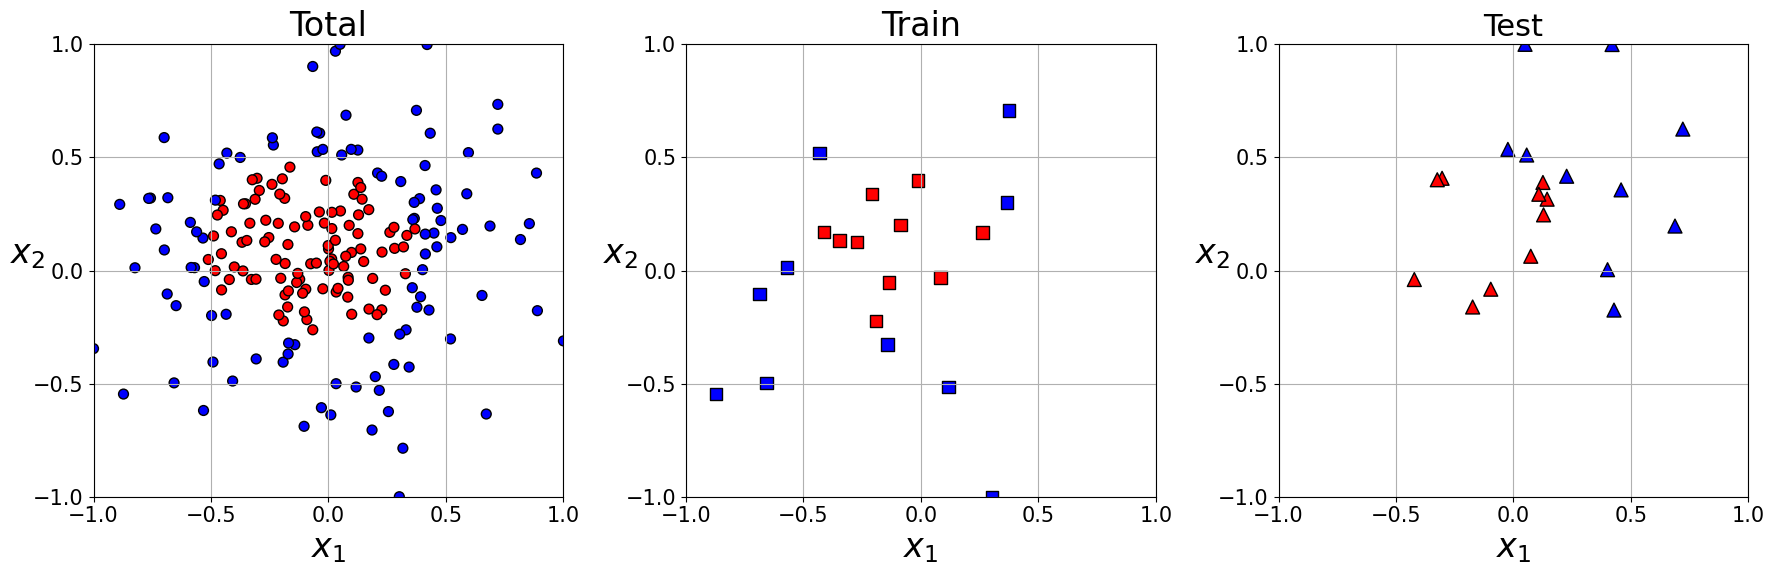

In [10]:
from sklearn.datasets import make_gaussian_quantiles

n_samples = 200
X, y = make_gaussian_quantiles(n_samples=n_samples, n_features=2, n_classes=2, shuffle=True, random_state=10)
y = 2*y-1

# Data rescaling
xmin = -1; xmax = 1
X = MinMaxScaler(feature_range=(xmin, xmax), copy=False).fit_transform(X)

train_size = 20
test_size = 20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=train_size, 
    test_size=test_size,
    stratify=y,
    random_state=seed
)

visualize_dataset()

# Moons dataset

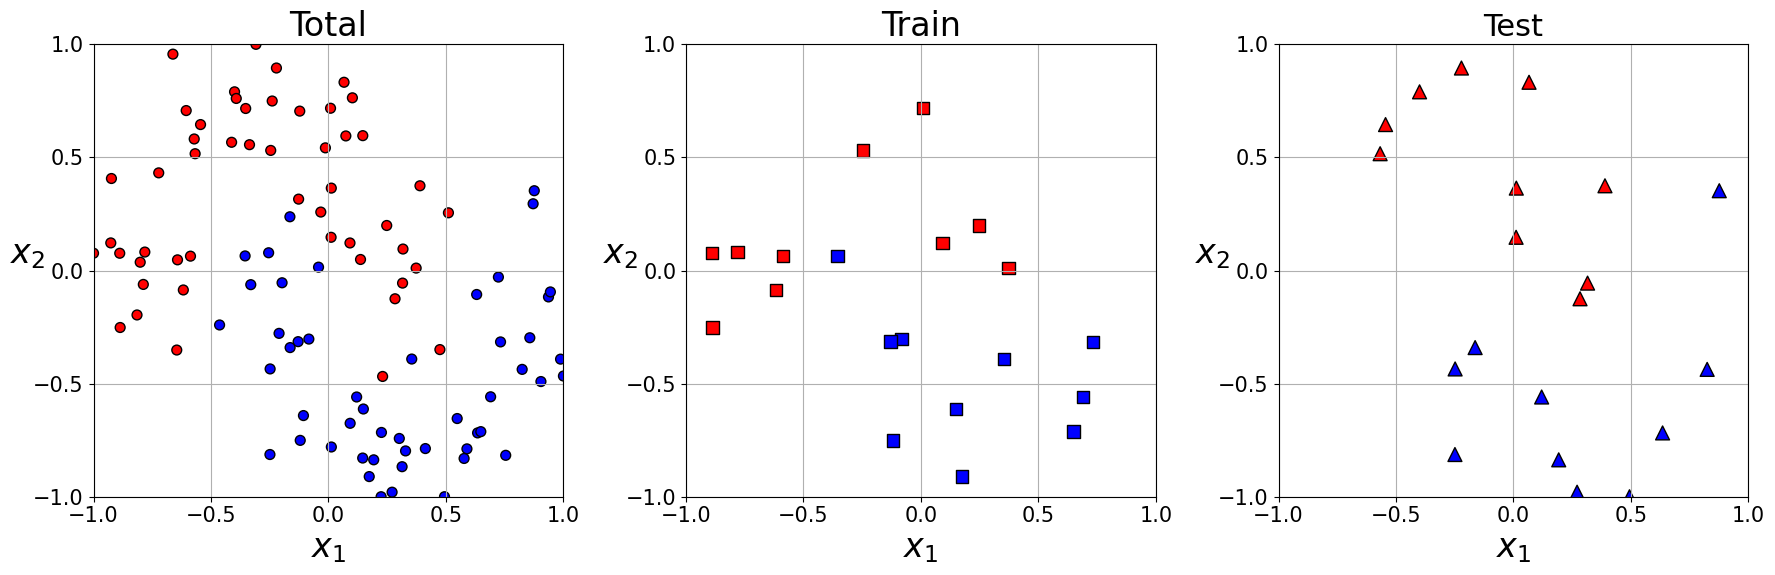

In [20]:
from sklearn.datasets import make_moons

n_samples = 100
X, y = make_moons(n_samples=n_samples, noise=0.2, random_state=32345)
y = 2*y-1

# Data rescaling
xmin = -1; xmax = 1
X = MinMaxScaler(feature_range=(xmin, xmax), copy=False).fit_transform(X)

train_size = 20
test_size = 20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=train_size, 
    test_size=test_size,
    stratify=y,
    random_state=seed
)

visualize_dataset()